<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset collected in Assignment 2**.

Hint: You may use *scipy* and *numpy* packages in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

1. Count the frequency of all the N-grams (N=3).
2. Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1)/count(w2). For example, count(really like) / count(really) = 1/3 = 0.33.
3. Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [3]:
# Write your code here

import pandas as pd
from nltk import ngrams, FreqDist, word_tokenize
from nltk.tag import pos_tag

# Sample dataset
data=pd.read_csv(r'C:\Users\somas\Downloads\amazon_reviews_dataset.csv')


df = pd.DataFrame(data)
df.head()


,Review
0,I bought this phone for my gf for Christmas an...
1,"I had my doubts about buying renewed products,..."
2,Purchased for use outside of U.S.A. Be sure th...
3,Ordered renewed above excellent and received t...
4,Got this because I couldn’t upgrade with T-Mob...


In [6]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\somas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [9]:
from nltk import FreqDist, ngrams, word_tokenize, pos_tag
import pandas as pd

# Assuming df is your DataFrame containing the 'Review' column

# Function to calculate N-gram frequencies
def calculate_ngram_frequencies(text, n):
    tokens = word_tokenize(text.lower())
    n_grams = list(ngrams(tokens, n))
    return FreqDist(n_grams)

# Function to calculate bigram probabilities
def calculate_bigram_probabilities(text):
    bigram_frequencies = calculate_ngram_frequencies(text, 2)
    unigram_frequencies = calculate_ngram_frequencies(text, 1)

    # Avoid division by zero
    bigram_probabilities = {bigram: bigram_frequencies[bigram] / unigram_frequencies[bigram[0]]
                            if unigram_frequencies.get(bigram[0], 0) != 0 else 0
                            for bigram in bigram_frequencies}

    return bigram_probabilities

# Function to extract and calculate relative noun phrase probabilities
def extract_and_calculate_noun_phrase_probabilities(text, dataset):
    tokens = word_tokenize(text.lower())
    tagged_tokens = pos_tag(tokens)

    # Extract noun phrases
    noun_phrases = [word for word, pos in tagged_tokens if pos.startswith('NN')]

    # Calculate frequency of each noun phrase in the entire dataset
    global_frequencies = calculate_ngram_frequencies(' '.join(dataset['Review']), 1)

    # Calculate relative probabilities
    relative_probabilities = {noun_phrase: global_frequencies[noun_phrase] / max(global_frequencies.values()) for noun_phrase in set(noun_phrases)}

    return relative_probabilities

# Apply functions to the dataset
df['Bigram Probabilities'] = df['Review'].apply(calculate_bigram_probabilities)
df['Noun Phrase Probabilities'] = df['Review'].apply(lambda x: extract_and_calculate_noun_phrase_probabilities(x, df))

# Print the results
print("Bigram Probabilities:")
print(df[['Review', 'Bigram Probabilities']])

print("\nNoun Phrase Probabilities:")
print(df[['Review', 'Noun Phrase Probabilities']])


Bigram Probabilities:
                                              Review  \
0  I bought this phone for my gf for Christmas an...   
1  I had my doubts about buying renewed products,...   
2  Purchased for use outside of U.S.A. Be sure th...   
3  Ordered renewed above excellent and received t...   
4  Got this because I couldn’t upgrade with T-Mob...   
5  I love my new phone! It came in a cardboard bo...   
6  Would have given a five star is it never had s...   
7  like it , hope next 14 pro max come with 100% ...   
8  I can't give 5 stars as this is still a "used"...   
9  Primero me sentí triste porque pensé que no er...   

                                Bigram Probabilities  
0  {('this', 'phone'): 0, ('to', 'her'): 0, ('.',...  
1  {('.', 'i'): 0, ('the', 'phone'): 0, (',', 'th...  
2  {('purchased', 'for'): 0, ('for', 'use'): 0, (...  
3  {('ordered', 'renewed'): 0, ('renewed', 'above...  
4  {('got', 'this'): 0, ('this', 'because'): 0, (...  
5  {('tool', '.'): 0, ('’', 't'

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

1. To build the **documents-terms weights (tf*idf) matrix bold text**.

2. To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [14]:
# Write your code here

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sample data (replace this with your own dataset)
data = pd.read_csv(r'C:\Users\somas\Downloads\amazon_reviews_dataset.csv')

# Assuming 'Review' is the column containing text data in your dataset
documents = data['Review'].tolist()

# Query
query = "I had my doubts about buying renewed products, especially when talking about high cost phones. I always buy on Apple, but this time seeing that the new iPhone had no big changes at all, I decided to give it a try. The phone is just as new as a new from the Apple Store, I’m impressed about the quality control that Amazon or the seller has to offer these products. The phone still has 4 months warranty with Apple, the battery life is about 100% capacity. I would definitely recommend to get a phone through this kind of service. As you know and if you are familiar with iOS, there’s no need to specify how great and fluid the phone works. I would recommend the pro over the regular one just because of the 120hz range, the battery, the camera and the processor."

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = vectorizer.fit_transform(documents)

# Transform the query
query_vector = vectorizer.transform([query])

# Calculate cosine similarity between the query and documents
cosine_similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()

# Rank documents based on cosine similarity
document_ranking = sorted(enumerate(cosine_similarities), key=lambda x: x[1], reverse=True)

# Print the results
print("Query:", query)
print("\nDocument Ranking:")
for rank, (doc_index, similarity) in enumerate(document_ranking):
    print(f"Rank {rank + 1}: Document {doc_index + 1}, Similarity: {similarity:.4f}")
    print("   ", documents[doc_index])
    print()


Query: I had my doubts about buying renewed products, especially when talking about high cost phones. I always buy on Apple, but this time seeing that the new iPhone had no big changes at all, I decided to give it a try. The phone is just as new as a new from the Apple Store, I’m impressed about the quality control that Amazon or the seller has to offer these products. The phone still has 4 months warranty with Apple, the battery life is about 100% capacity. I would definitely recommend to get a phone through this kind of service. As you know and if you are familiar with iOS, there’s no need to specify how great and fluid the phone works. I would recommend the pro over the regular one just because of the 120hz range, the battery, the camera and the processor.

Document Ranking:
Rank 1: Document 2, Similarity: 1.0000
    I had my doubts about buying renewed products, especially when talking about high cost phones. I always buy on Apple, but this time seeing that the new iPhone had no bi

# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

1. Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

2. Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

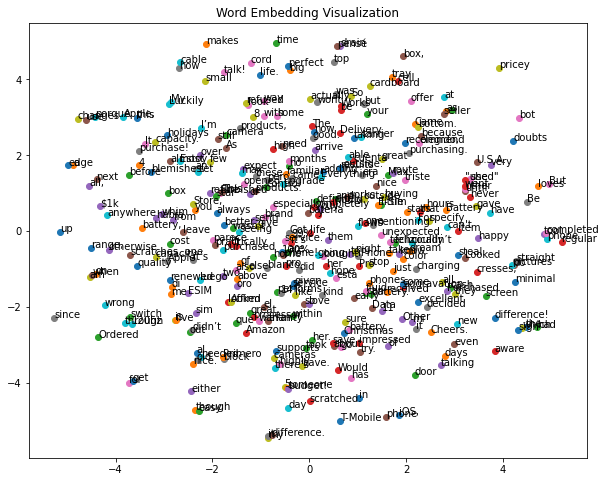

In [16]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example corpus (replace this with your actual corpus)
data = pd.read_csv(r'C:\Users\somas\Downloads\amazon_reviews_dataset.csv')
corpus = data['Review'].tolist()

# Tokenize the corpus
tokenized_corpus = [sentence.split() for sentence in corpus]

# Train Word2Vec model
embedding_model = Word2Vec(sentences=tokenized_corpus, vector_size=300, window=5, min_count=1, workers=4)

# Get vectors and corresponding words
words = list(embedding_model.wv.index_to_key)
vectors = np.array([embedding_model.wv[word] for word in words])

# Visualize word embeddings using t-SNE
tsne_model = TSNE(n_components=2, random_state=42, n_iter=300)
vectors_2d = tsne_model.fit_transform(vectors)

# Create a DataFrame for visualization
df = pd.DataFrame({'word': words, 'x': vectors_2d[:, 0], 'y': vectors_2d[:, 1]})

# Plot word embeddings
plt.figure(figsize=(10, 8))
for i, row in df.iterrows():
    plt.scatter(row['x'], row['y'])
    plt.annotate(row['word'], (row['x'], row['y']))

plt.title('Word Embedding Visualization')
plt.show()


# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file
https://github.com/somashivasai/INFO5731_EXC_05/blob/main/dataset_for_assg04.csv

# Link:

